This notebook will include some of the work from each group member, along with our final conclusion.
Group intro: We are using data to try and find the best neighborhood in Pittsburgh. The specific metrics we will be looking at are the number of smart trash cans in each neighborhood, the amount of playground equipment in each neighborhood, and the air quality of each neighborhood.


Here are our imports.

In [5]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Here is Gary's work. His dataset was Smart Trash Containers.

Intro: We are using data to try and determine the best neighborhood in Pittsburgh. I choose the smart trash cans data set since it showed every smart trash can operated by the city, and which neighborhood it is in. If a neighborhood has more smart trash cans, it probably has less garbage on the street and it is a nicer place to live. Therefore, my metric is the number of smart trash cans in each neighborhood and the best neighborhood will have the most smart trash cans.

Below is the setup code.

In [94]:
cans = pd.read_csv("GLF-smartCans.csv")
cans.head()

,_id,container_id,receptacle_model_id,address,zip,neighborhood
0,314722,1,74,122 E North Ave,15212,Central Northside
1,314723,2,74,2507 Brighton Rd,15212,Marshall-Shadeland
2,314724,3,74,1300 Federal St,15212,Central Northside
3,314725,4,74,110 Federal St,15212,Allegheny Center
4,314726,5,74,490 E North Ave,15212,Central Northside


Clearly the best neighborhoods would have the most smart trash cans. Therefore, we need to use a bar chart to see which neighborhoods have the most smart trash cans.

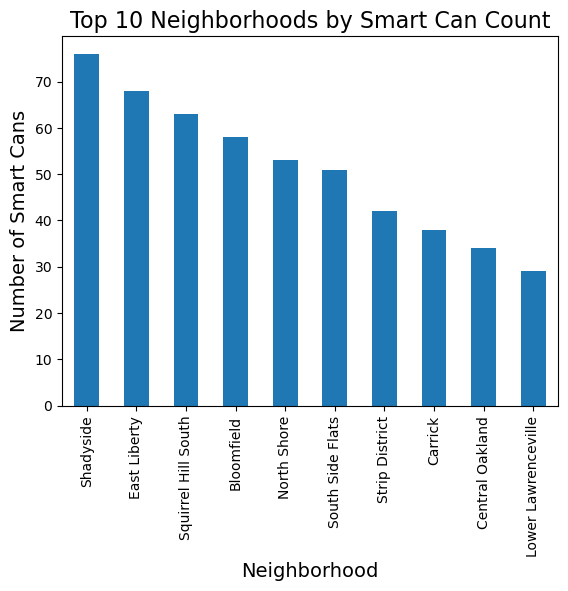

In [7]:
top_10 = cans["neighborhood"].value_counts().nlargest(10)
top_10.plot.bar()
plt.title("Top 10 Neighborhoods by Smart Can Count", fontsize=16)
plt.ylabel("Number of Smart Cans", fontsize=14)
plt.xlabel("Neighborhood", fontsize=14)
plt.show()

These charts provide some interesting information. Shadyside, East Liberty, Squirrel Hill South, Bloomfield, and the North Shore have the most smart trash cans. Additionally, there are nine neighborhoods that have only one smart trash can. Those nine should certaily be avoided.

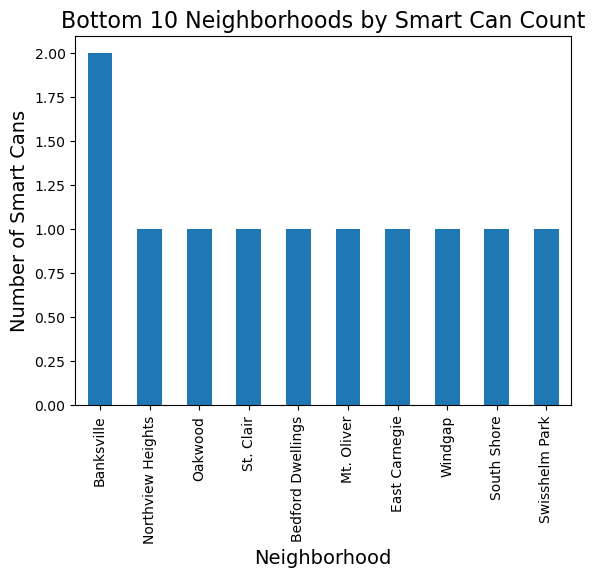

In [8]:
bottom_10 = cans["neighborhood"].value_counts().nsmallest(10).sort_values(ascending=False)
bottom_10.plot.bar()
plt.title("Bottom 10 Neighborhoods by Smart Can Count", fontsize=16)
plt.ylabel("Number of Smart Cans", fontsize=14)
plt.xlabel("Neighborhood", fontsize=14)
plt.show()

Finally, here is a heat map that shows the number of smart trash cans throughout all neighborhoods of the city. 

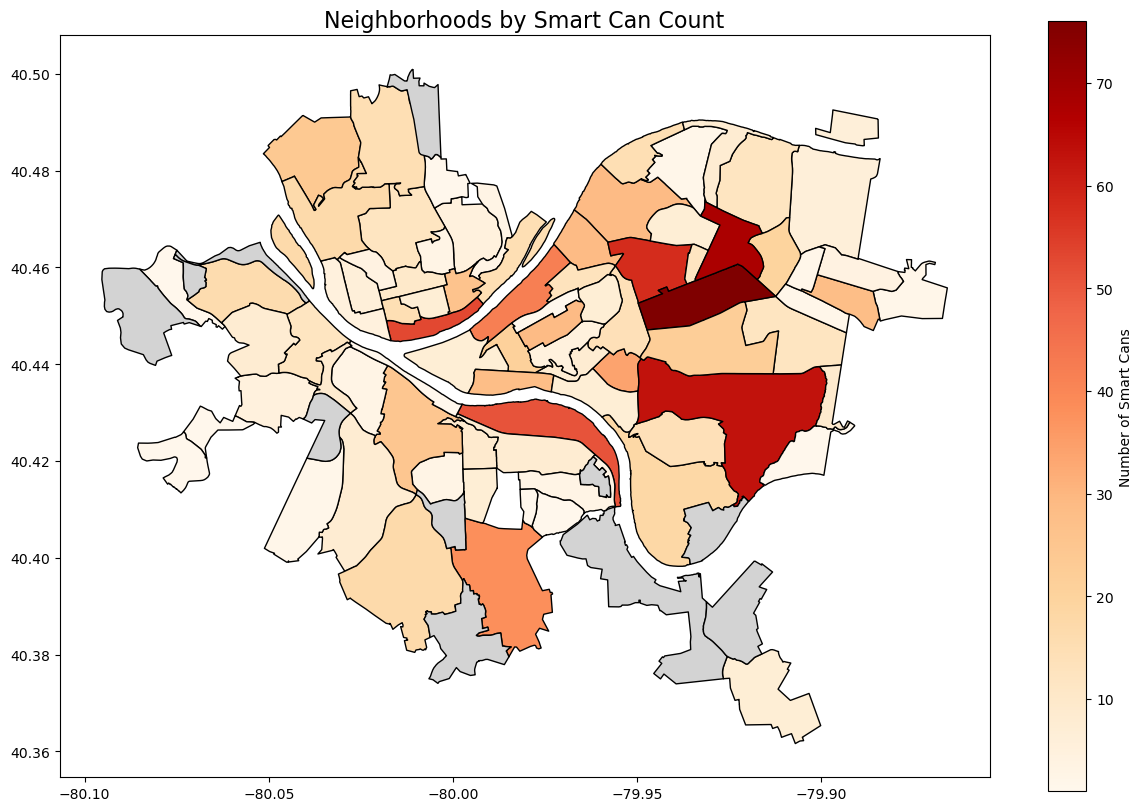

In [9]:
neighborhoods = geopandas.read_file("GLF-Neighborhoods/Neighborhoods_.shp")
smart_cans_count = cans.groupby('neighborhood').size().reset_index(name='smart_cans_count')
combo = neighborhoods.merge(smart_cans_count, left_on='hood', right_on='neighborhood', how='left')

combo.plot(column='smart_cans_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Smart Cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.title("Neighborhoods by Smart Can Count", fontsize=16)
plt.show()

The best neighborhood: My data shows that Shadyside is the best neighborhood, but East Liberty and Squirrel Hill South are closely behind. Additionally, there are nine neighborhoods with only one smart trash can. These neighborhoods are listed in the bar graph above, and they should be avoided.

Conclusion: One interesting thing that I notice is that most of the top neighborhoods for smart trash cans are east of the city. Personally, I live in the suburbs and I think it is nicer to live there than in the city. It should be noted, however, that I do not think there are any smart trash cans in my neighborhood. Maybe the number of smart trash cans per neighborhood is not correlated to the best place to live.

Moving on to our next group member, Sean. Below is the setup code.

In [10]:
air = pd.read_csv("Air-Quality.csv")
air.head()

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,75571,1/1/2024,Pittsburgh,NO2_500,9,Good,NaN,NaN
1,75572,1/1/2024,Pittsburgh,PM10_640,10,Good,NaN,NaN
2,75573,1/1/2024,North Braddock,PM25_640,19,Good,NaN,NaN
3,75574,1/1/2024,Parkway East,PM25_640,20,Good,NaN,NaN
4,75575,1/1/2024,Lawrenceville 2,SO2,0,Good,NaN,NaN


This line of code shows the possible air quality levels.

In [11]:
print((air["description"]).unique())

['Good' 'Moderate' 'Unhealthy for Sensitive Groups']


We want to focus on the observations where the air was not "Good".

In [12]:
badAir = air[(air['description'] == 'Moderate') | (air['description'] == 'Unhealthy for Sensitive Groups')]

Cutting out unneeded info such as date, index value and parameter. Shortening it down to just site and description

In [19]:
new_badAir = badAir[['site', 'description']]
new_badAir.head()

,site,description
131,Pittsburgh,Moderate
159,North Braddock,Moderate
160,Parkway East,Moderate
171,Avalon,Moderate
172,Liberty,Moderate


Create a bar graph showing number of reports of moderate air quality or worse

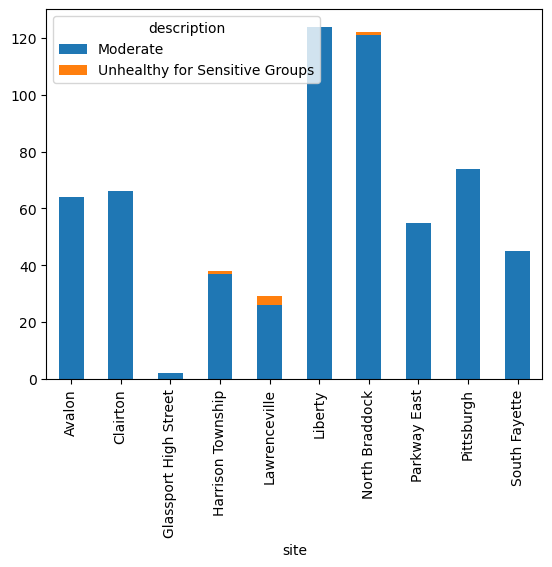

In [26]:
badCounts = new_badAir.groupby(['site', 'description']).size().unstack(fill_value=0)
badCounts.plot(kind='bar', stacked = True)
plt.show()

Finally, lets look at the percentage of good readings per neighborhood. 

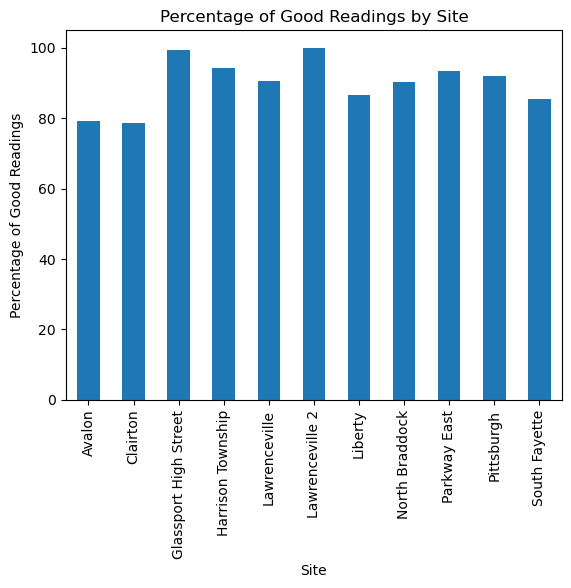

In [93]:
averageAir = air[['site', 'description']]
total_counts = averageAir.groupby('site').size()
good_counts = averageAir[averageAir['description'] == 'Good'].groupby('site').size()
percentage_good = (good_counts / total_counts * 100).fillna(0)
percentage_good.plot(kind='bar')
plt.xlabel('Site')
plt.ylabel('Percentage of Good Readings')
plt.title('Percentage of Good Readings by Site')
plt.show()

And now our final group member, Jack. Below is the setup code.

In [27]:
playground = pd.read_csv("playgroundEquipment.csv")
playground.head()

,_id,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,2,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,3,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,4,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,5,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817


When it comes to being the best neighborhood, a key factor is how much playground equipment that said neighborhood has. So we need a chart to show which one has the most.

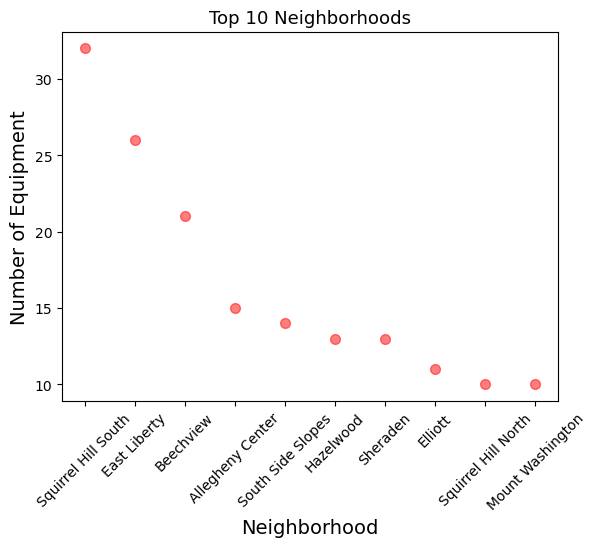

In [28]:
neighborhood_counts = playground['neighborhood'].value_counts().nlargest(10)
plt.scatter(neighborhood_counts.index, neighborhood_counts.values, color='red', alpha=0.5, s=50)
plt.title("Top 10 Neighborhoods", fontsize=13)
plt.xlabel("Neighborhood", fontsize=14)
plt.ylabel("Number of Equipment", fontsize=14)
plt.xticks(rotation=45)
plt.show()

This scatter plot demonstrates that Squirrel Hill South has the most playground equipment compared to the other neighborhoods. This is only the top 10, so just because Mount Washington is coming in last on the chart, does not mean they have the least in all of Pittsburgh.

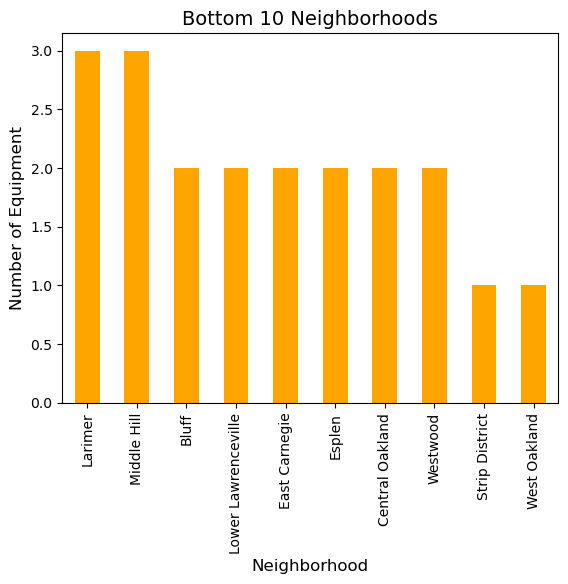

In [31]:
last = playground["neighborhood"].value_counts().nsmallest(10).sort_values(ascending=False)
last.plot.bar(color='orange')
plt.title("Bottom 10 Neighborhoods", fontsize=14)
plt.ylabel("Number of Equipment", fontsize=12)
plt.xlabel("Neighborhood", fontsize=12)
plt.show()

Now this bar graph demonstrates the lowest playground equipment in each neighborhood. This chart is basically saying that the Strip District and West Oakland are the two most unfun neighborhoods in Pittsburgh.

Putting it all together: We believe that the best neighborhood would have the most number of smart trash cans, the highest average air quality, and the most playgrounds. There are many steps to make this happen. First we will get our data together.

In [76]:
FinalcansValueCounts = cans["neighborhood"].value_counts()
Finalneighborhood_counts = playground['neighborhood'].value_counts()
Finalpercentage_good = percentage_good

Currently our data is all in series form, not as a dataframe. We need to give these series a name so that each one shows up correctly in our final graph.

In [77]:
FinalcansValueCounts.name = "Number of smart cans"
Finalneighborhood_counts.name = "Amount of playground equipment"
Finalpercentage_good.name = "Percentage of good air quality readings"

Now we need to put these 3 series together into just one.

In [89]:
FinalTogether = pd.concat([FinalcansValueCounts, Finalneighborhood_counts, Finalpercentage_good], axis=1)
type(FinalcansValueCounts)

pandas.core.series.Series

In [88]:
type(FinalTogether)

pandas.core.frame.DataFrame

You can also see that when we put the data together it turned from a Series to a DataFrame. There are a lot of neighborhoods in our data. We only want to look at the top and bottom 20, since showing all at once will lead to a very messy graph. We will be sorting our neighborhoods based on total scores, and then a list of the top and bottom 20 scores.

In [85]:
FinalTogether['total'] = FinalTogether.sum(axis=1)
FinalTogetherHigh = FinalTogether.sort_values(by='total', ascending=False).head(20)
FinalTogetherLow = FinalTogether.sort_values(by='total', ascending=False).tail(20)

Now we need to get rid of our new 'total' column so we can graph the individual portions of the neighborhood scores.

In [90]:
FinalTogetherHigh = FinalTogetherHigh.drop(columns=['total'])
FinalTogetherLow = FinalTogetherLow.drop(columns=['total'])

Now we will graph the top 20 neighborhoods.

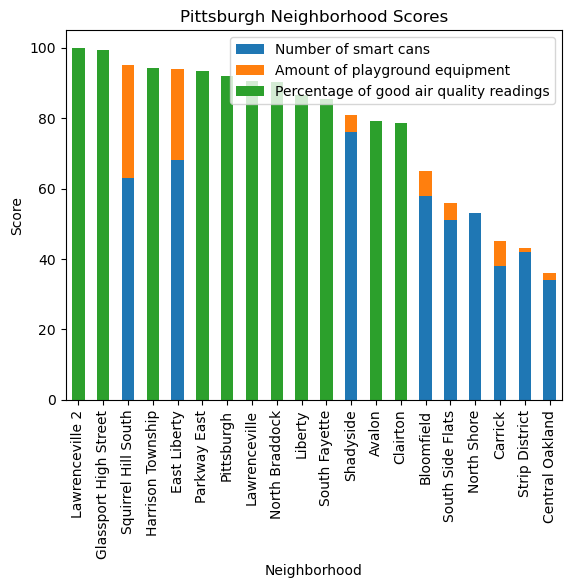

In [91]:
FinalTogetherHigh.plot(kind='bar', stacked=True)
plt.title('Pittsburgh Neighborhood Scores')
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.show()

Now we will graph the bottom 20 neighborhoods.

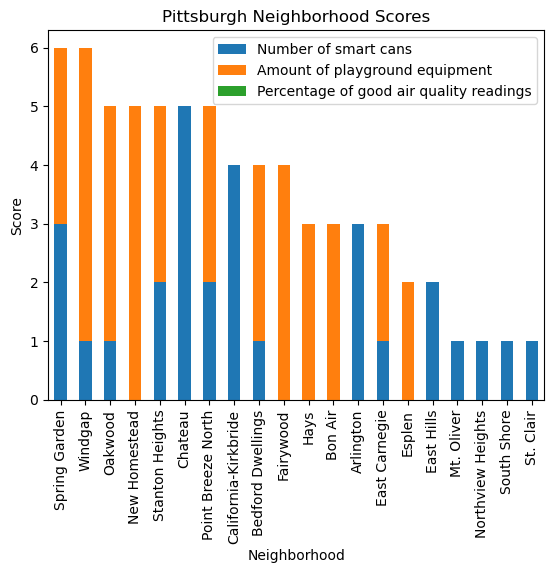

In [92]:
FinalTogetherLow.plot(kind='bar', stacked=True)
plt.title('Pittsburgh Neighborhood Scores')
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.show()

Best neighborhood: From our data, we believe that East Liberty is the best neighborhood. This is because East Liberty has a very high combined score of smart trash cans and playground equipment. Additionally, Liberty has a high percentage of good air quality readings. Considering the data collected from all of our metrics, we believe this is the best neighborhood. 

Conclusion: Unfortunately, while the neighborhood names for our smart can and playground equipment datasets matched, the air quality dataset had different site names. We think this is because there are not a lot of places in the city where air quality is measured. From our research, it looks like the dataset only had 11 locations. While we could try and match the air quality sites with our other data, that would decrease the validity of our results (We would be making things up). Therefore, since we have data that shows that East Liberty has strong results in all categories, we are saying it is the winner.